In [2]:
#from replay import ReplayBuffer
#import torch
#import torchvision
import numpy as np
#import scipy
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
#import seaborn as sns
#import pandas as pd
#sns.set_theme()
#import io
from tqdm import tqdm
#from PIL import Image
#import umap

c:\Users\jwatr\anaconda3\envs\CS330_CUDA\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
datasets = {
    'Random': 'visualize_final/random_button_press.npz',
    'Vanilla RND': 'visualize_final/vrnd_button_press.npz',
    'Hindsight GCRL': 'visualize_final/gcrl_button_press_sac.npz',
    'APS': 'visualize_final/aps_button_press_2.npz',
    'CIC': 'visualize_final/cic_button_press.npz',
}
colors = {
    'Random': 'green',
    'Vanilla RND': 'blue',
    'Hindsight GCRL': 'red',
    'APS': 'orange',
    'CIC': 'purple'
}

In [4]:
for k in datasets.keys():
    rb = ReplayBuffer.load(datasets[k])
    sa = rb['state'][:rb.size]#np.concatenate((rb['state'], rb['action']), axis=1)[:rb.size]
    datasets[k] = sa

In [5]:
overall_sa = np.vstack(list(datasets.values()))
pca = PCA(svd_solver='full')
pca.fit(overall_sa)

PCA(svd_solver='full')

In [6]:
pca_per = { k: PCA(svd_solver='full') for k in datasets.keys()  }
for k, v in pca_per.items():
    v.fit(datasets[k])
svs = { k: p.singular_values_ for k, p in pca_per.items() }

In [7]:
pcad = { k: pca.transform(v) for k, v in tqdm(datasets.items()) }

100%|██████████| 5/5 [00:01<00:00,  3.08it/s]


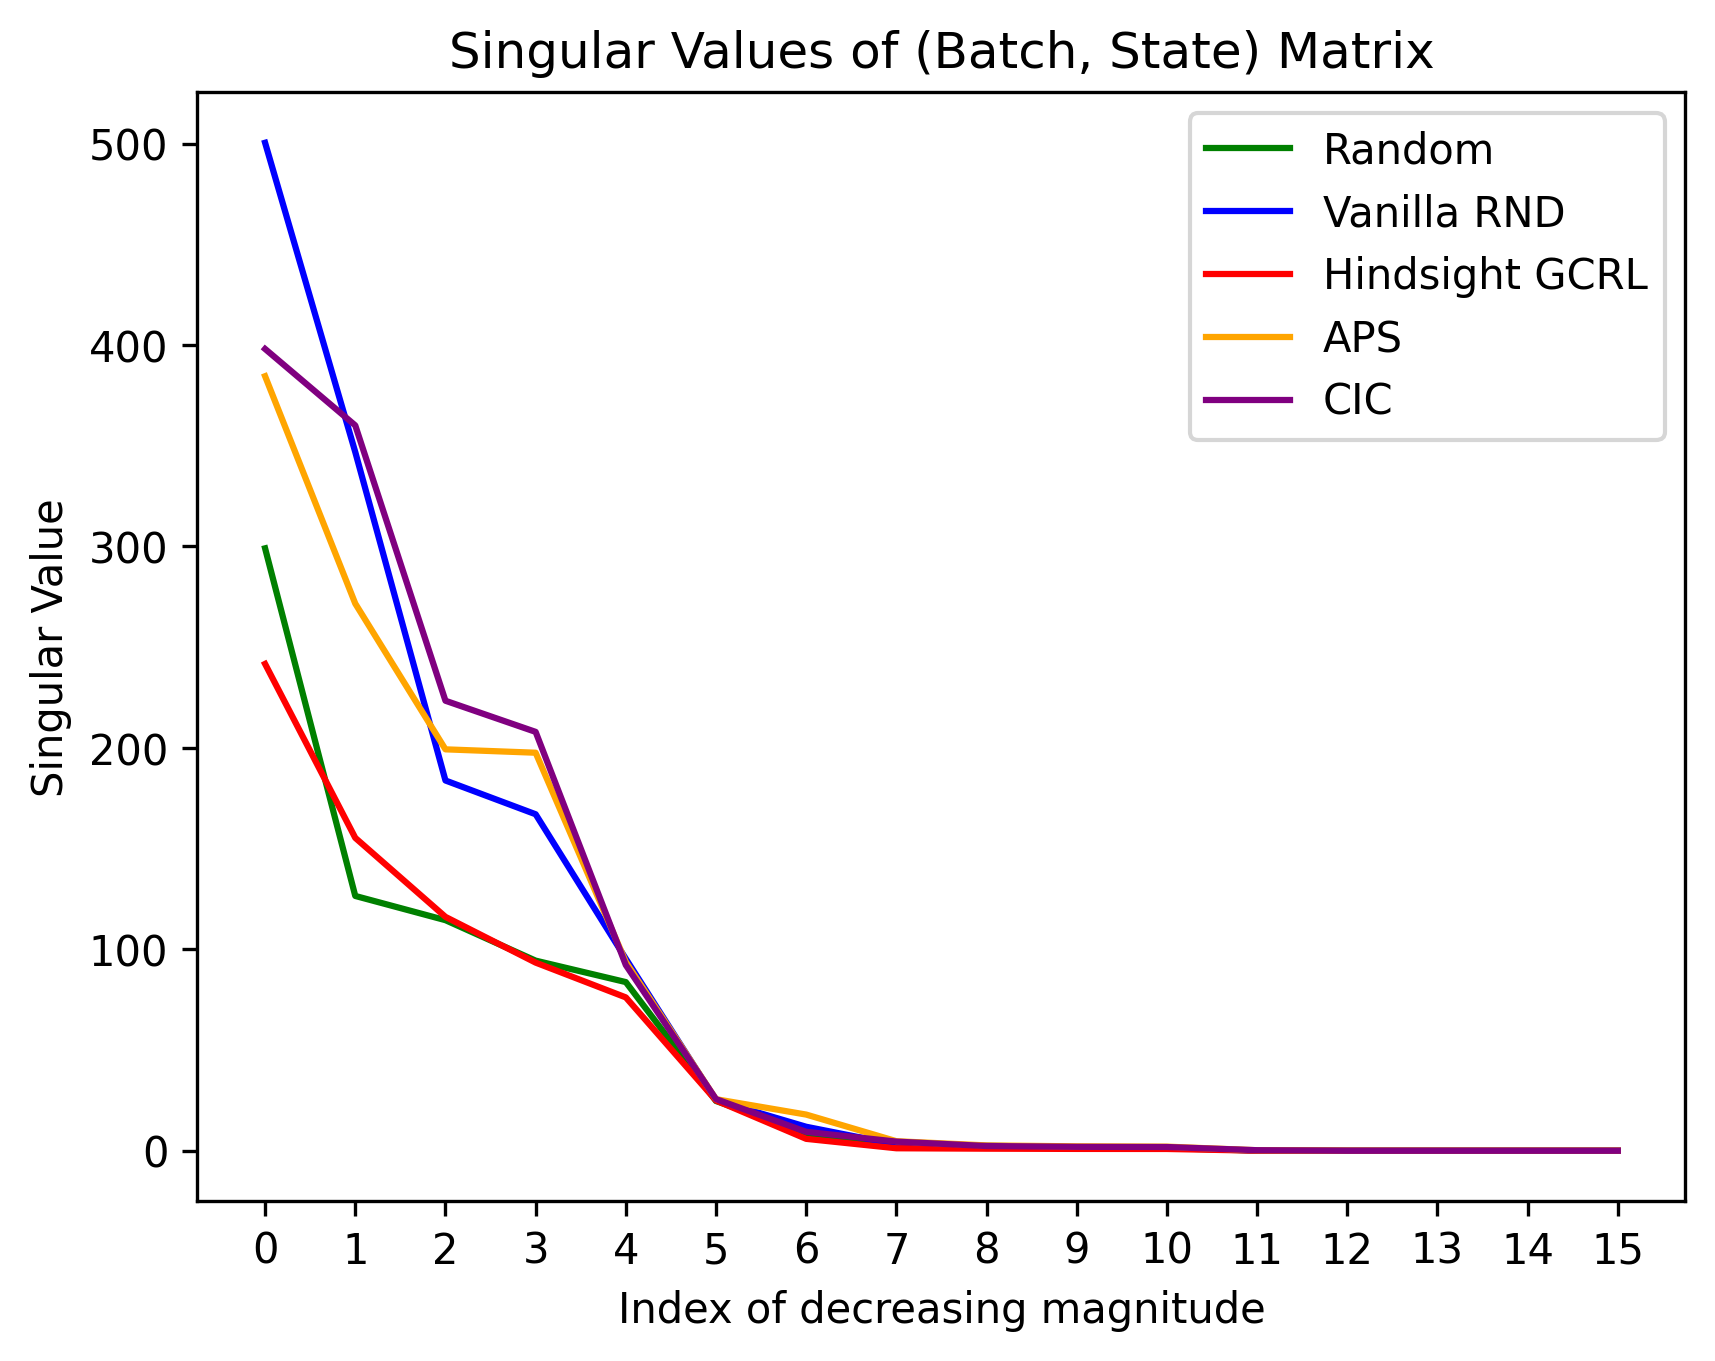

In [8]:
font = {}
max_x = 16
plt.figure(dpi=300)
plt.xscale('linear')
plt.xticks(np.arange(0, max_x+1, 1))
plt.yscale('linear')
for k in datasets.keys():
    plt.plot(range(max_x), svs[k][:max_x], color=colors[k], label=k)
plt.title('Singular Values of (Batch, State) Matrix', **font)
plt.legend()
plt.xlabel('Index of decreasing magnitude', **font)
plt.ylabel('Singular Value', **font)
plt.show()

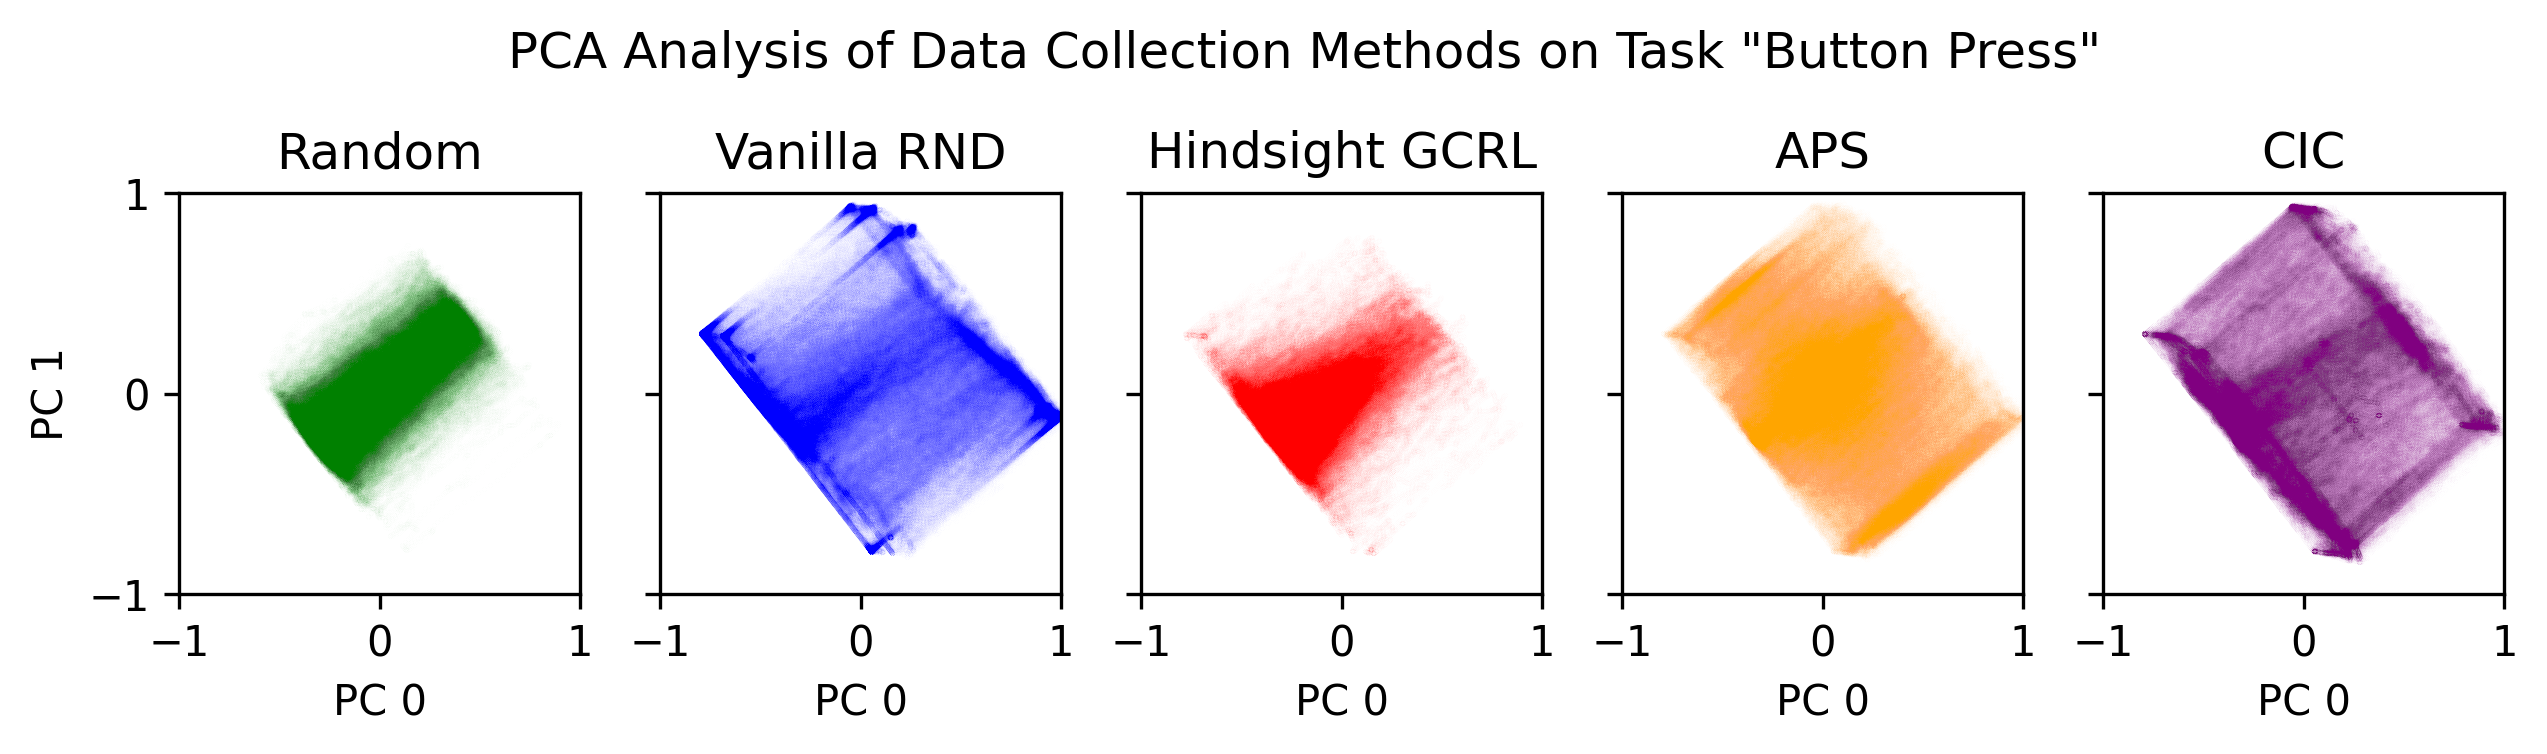

In [14]:
markersize = 0.0000045
fig, axs = plt.subplots(1, 5, dpi=300)
#fig.delaxes(axs[1,2])
fig.suptitle('PCA Analysis of Data Collection Methods on Task "Button Press"')
fig.set_figwidth(10)
fig.set_figheight(2.5)

for ax in axs.flat:
    ax.set(xlabel='PC 0', ylabel='PC 1')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


for i, (k, v) in enumerate(pcad.items()):
    px, py = i, 0
    ax = axs[px]
    ax.set_title(k)
    ax.scatter(x=v[:,0],
               y=v[:,1], s=markersize,
               color=colors[k], label=k)
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    ax.set_box_aspect(1)
    ax.set_xticks([-1,0,1])
    ax.set_yticks([-1,0,1])

plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
    
#plt.legend(markerscale=0.001/markersize, loc='upper right')
    #plt.xlabel(f'Principal Component 0')
    #plt.ylabel(f'Principal Component 1')
plt.show()